In [1]:
# dataset : https://www.kaggle.com/datasets/imbikramsaha/caltech-101
# model link : https://www.kaggle.com/datasets/keras/vgg16/

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
dataset_dir = "caltech-101-img" #Specifies the directory path where the dataset is located
dataset_datagen = ImageDataGenerator(rescale=1.0 / 255,)
#normalises the image

# # here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(dataset_dir,
                                                        target_size=(64, 64),batch_size=batch_size,class_mode='categorical')

Found 9144 images belonging to 102 classes.


In [5]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [7]:
from tensorflow.keras.applications import VGG16

In [8]:
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

In [9]:
for layer in base_model.layers:
   layer.trainable = False

In [10]:
x = Flatten()(base_model.output)
# Explanation: This line adds a Flatten layer to the output of the base_model. The Flatten layer is used to transform the 3D tensor output from the convolutional base (which is usually the output of the last convolutional layer) into a 1D tensor. This flattening step is necessary when transitioning from convolutional layers to densely connected layers.
# Example: Suppose the output shape of base_model is (7, 7, 512). This means you have a 3D tensor with dimensions 7x7x512. Applying the Flatten layer converts this 3D tensor into a 1D tensor by unraveling the values along the dimensions. In this case, the resulting 1D tensor would have a size of 7 * 7 * 512 = 25088.
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 26s 797ms/step - loss: 4.0381 - accuracy: 0.1865 - val_loss: 3.4886 - val_accuracy: 0.2770
Epoch 2/10
32/32 [==============================] - 24s 776ms/step - loss: 3.1434 - accuracy: 0.3280 - val_loss: 3.0363 - val_accuracy: 0.3420
Epoch 3/10
32/32 [==============================] - 25s 787ms/step - loss: 2.6575 - accuracy: 0.4340 - val_loss: 2.7139 - val_accuracy: 0.4255
Epoch 4/10
32/32 [==============================] - 25s 782ms/step - loss: 2.2778 - accuracy: 0.5015 - val_loss: 2.4631 - val_accuracy: 0.4725
Epoch 5/10
32/32 [==============================] - 25s 782ms/step - loss: 1.9556 - accuracy: 0.5725 - val_loss: 2.2854 - val_accuracy: 0.5075
Epoch 6/10
32/32 [==============================] - 25s 784ms/step - loss: 1.7182 - accuracy: 0.6285 - val_loss: 2.1648 - val_accuracy: 0.5335
Epoch 7/10
32/32 [==============================] - 25s 789ms/step - loss: 1.5225 - accuracy: 0.6645 - val_loss: 2.0709 - val_accuracy: 0.5395

In [12]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
32/32 [==============================] - 31s 973ms/step - loss: 3.2501 - accuracy: 0.3205 - val_loss: 2.4281 - val_accuracy: 0.4625
Epoch 2/20
32/32 [==============================] - 31s 993ms/step - loss: 1.9535 - accuracy: 0.5460 - val_loss: 1.9240 - val_accuracy: 0.5600
Epoch 3/20
32/32 [==============================] - 31s 997ms/step - loss: 1.2925 - accuracy: 0.6715 - val_loss: 1.7384 - val_accuracy: 0.5845
Epoch 4/20
32/32 [==============================] - 30s 935ms/step - loss: 0.7884 - accuracy: 0.7875 - val_loss: 1.5832 - val_accuracy: 0.6135
Epoch 5/20
32/32 [==============================] - 30s 937ms/step - loss: 0.5094 - accuracy: 0.8675 - val_loss: 1.6411 - val_accuracy: 0.6145
Epoch 6/20
32/32 [==============================] - 30s 956ms/step - loss: 0.2911 - accuracy: 0.9170 - val_loss: 1.7153 - val_accuracy: 0.6160
Epoch 7/20
32/32 [==============================] - 29s 920ms/step - loss: 0.2042 - accuracy: 0.9455 - val_loss: 1.7285 - val_accuracy: 0.6275

In [13]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 [==============================] - 15s 238ms/step


In [14]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  grand_piano
Actual:  grand_piano


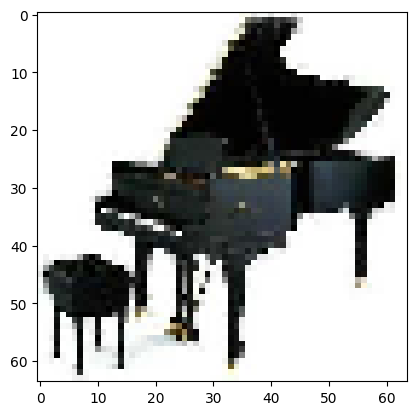

In [15]:
n = 887

plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])